# Heart Disease Prediction

## 🩺 Predicting heart disease using machine learning
*  Heart disease, alternatively known as cardiovascular disease, encases various conditions that impact the heart and is the primary basis of death worldwide over the span of the past few decades. It associates many risk factors in heart disease and a need of the time to get accurate, reliable, and sensible approaches to make an early diagnosis to achieve prompt management of the disease.


* This project  aims to made a  model on basis of supervised learning algorithms as Naïve Bayes, decision tree, K-nearest neighbor, and random forest algorithm..., It uses the existing dataset from the Cleveland database of UCI repository of heart disease patients. 


* The strength of the proposed model was quiet satisfying and was able to predict evidence of having a heart disease in a particular individual by using  various classification models such as KNN,logistic regression,,SVM,Naive Bytes ... and find the best one  which showed a good accuracy in comparison to the previously used classifier .

## 📑 Problem Definition

   Given clinical parameters about a patient, can we predict whether or not they have heart disease?

## 💾 Create data dictionary(Anderstanding our features)

1.age: The person's age in years

2.sex: The person's sex (1 = male, 0 = female)

3.cp: The chest pain experienced (Value 1: typical angina, Value 2: atypical angina, Value 3: non-anginal pain, Value 4: asymptomatic)

4.trestbps: The person's resting blood pressure (mm Hg on admission to the hospital)

5.chol: The person's cholesterol measurement in mg/dl

6.fbs: The person's fasting blood sugar (> 120 mg/dl, 1 = true; 0 = false)

7.restecg: Resting electrocardiographic measurement (0 = normal, 1 = having ST-T wave abnormality, 2 = showing probable or definite left ventricular hypertrophy by Estes' criteria)

8.thalach: The person's maximum heart rate achieved

9.exang: Exercise induced angina (1 = yes; 0 = no)

10.oldpeak: ST depression induced by exercise relative to rest ('ST' relates to positions on the ECG plot. See more here)

11.slope: the slope of the peak exercise ST segment (Value 1: upsloping, Value 2: flat, Value 3: downsloping)

12.ca: The number of major vessels (0-3)

13.thal: A blood disorder called thalassemia (3 = normal; 6 = fixed defect; 7 = reversable defect)

14.target: Heart disease (0 = no, 1 = yes)

* Heart disease risk factors to the following: high cholesterol, high blood pressure, diabetes, weight, family history and smoking .

* According to another source , the major factors that can't be changed are: increasing age, male gender and heredity.

* Note that thalassemia, one of the variables in this dataset, is heredity.

* Major factors that can be modified are: Smoking, high cholesterol, high blood pressure, physical inactivity, and being overweight and having diabetes.

* Other factors include stress, alcohol and poor diet/nutrition.

### Loading libraries

In [1]:
import os
print(os.listdir())


import warnings
warnings.filterwarnings('ignore')



#loading dataset
import pandas as pd
import numpy as np


#visualisation
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")
from scipy import stats

# data preprocessing
from sklearn.preprocessing import StandardScaler


# data splitting
from sklearn.model_selection import train_test_split


# data modeling
from sklearn.metrics import confusion_matrix,accuracy_score,roc_curve,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC


#ensembling
from mlxtend.classifier import StackingCVClassifier

from sklearn.model_selection import GridSearchCV

['.ipynb_checkpoints', 'chechpoint8_K-Means_&_Hierarchical_Clustering (3) (1).ipynb', 'chechpoint8_K-Means_&_Hierarchical_Clustering (3) (3).ipynb', 'DataPreprocessing', 'exercices_1 (7).ipynb', 'exercices_2 (1).ipynb', 'exercices_dictionnaire.ipynb', 'exercices_set.ipynb', 'exercices_tuples.ipynb', 'Final_Project', 'heartDiseaseAndAges.png', 'machine_learning', 'pandas_exercices', 'Project_Demo_GOMYCODE.ipynb', 'Test_Demo_Day.ipynb', 'unsupervised_Learning', 'Untitled.ipynb', 'Untitled1.ipynb', 'Untitled2.ipynb', 'Untitled3.ipynb']


### Loading and previewing data

In [2]:
heart_df = pd.read_csv("https://raw.githubusercontent.com/MrKhan0747/Heart-Disease-Detection/master/heart.csv")

In [3]:
heart_df.shape

(303, 14)

In [4]:
heart_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
heart_df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [6]:
heart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [7]:
# checking null values
heart_df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [8]:
# there is no Null values

## 🔍 Exploratory Data Analysis (EDA)

### 📌 Note:
* From the total dataset of 303 patients, 165 (54%) have a heart disease (target=1)and 138 person without heart disease, so our problem is balanced.
 

### Exploring our features:

In [9]:
#Let us plot hist of features to see all values, that we have

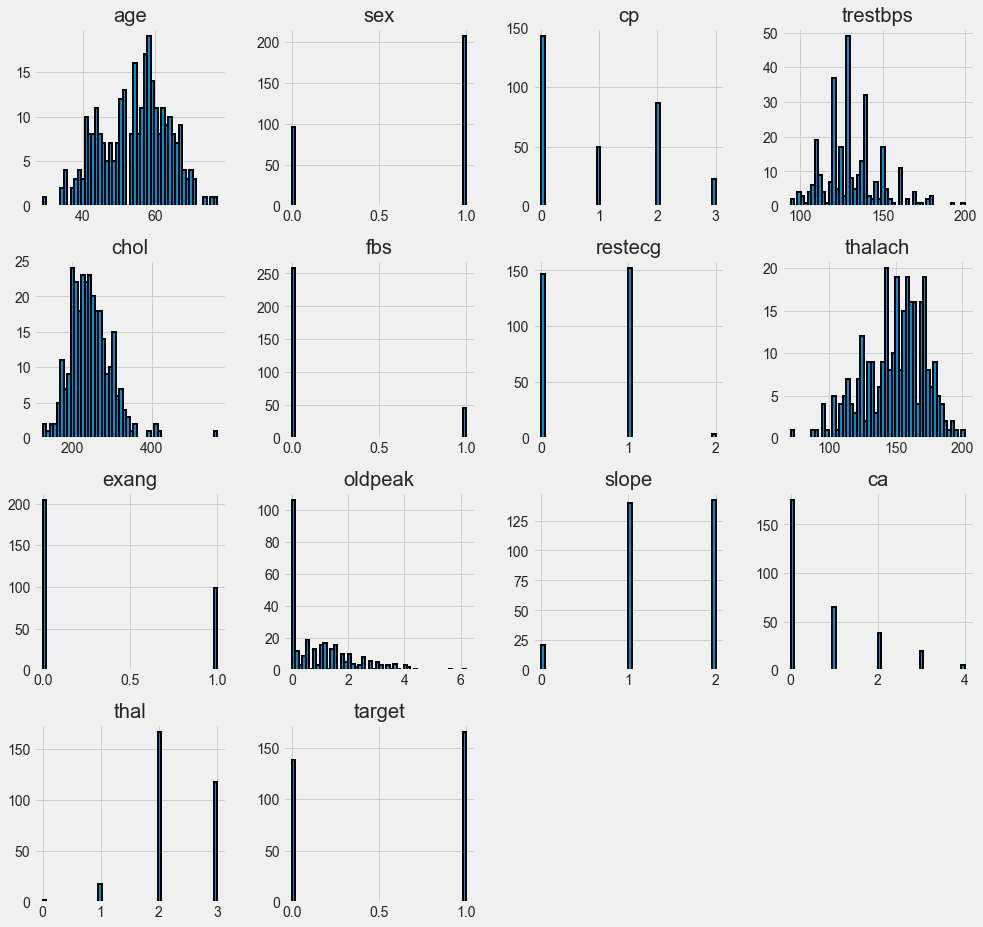

In [10]:
heart_df.hist(bins=50, figsize=(15,15), edgecolor='black', linewidth=2)
plt.show()

###  📌 Notes:
As a first look we can notice that:
* Sex can influence on being diagnostic with heart diseases ,here 0 is female and 1 is male patients
* Chest Pain Type may have a strong relationship with our target acording to classes(0,1,2,3)
* fasting blood sugar (fbs) is strongly related to our target (fasting blood sugar >120 mg/ 1 = true,0 = false)
* resting electrocardiographic results (restecg) can be a good feature to explore in order to predict our target

### Exploring more our categorical features:

In [11]:
categorial = [('sex', ['female', 'male']), 
              ('cp', ['typical angina', 'atypical angina', 'non-anginal pain', 'asymptomatic']), 
              ('fbs', ['fbs > 120mg', 'fbs < 120mg']), 
              ('restecg', ['normal', 'ST-T wave', 'left ventricular']), 
              ('exang', ['yes', 'no']), 
              ('slope', ['upsloping', 'flat', 'downsloping']), 
              ('thal', ['normal', 'fixed defect', 'reversible defect'])]

In [12]:
def plotGrid(isCategorial):
    if isCategorial:
        [plotCategorial(x[0], x[1], i) for i, x in enumerate(categorial)] 
    else:
        [plotContinuous(x[0], x[1], i) for i, x in enumerate(continuous)] 

In [13]:
# ploting our categorical features based on the target (0/1)
def plotCategorial(attribute, labels, ax_index):
    sns.countplot(x=attribute, data=heart_df, ax=axes[ax_index][0])
    sns.countplot(x='target', hue=attribute, data=heart_df, ax=axes[ax_index][1])
    avg = heart_df[[attribute, 'target']].groupby([attribute], as_index=False).mean()
    sns.barplot(x=attribute, y='target', hue=attribute, data=avg, ax=axes[ax_index][2])
    
    for t, l in zip(axes[ax_index][1].get_legend().texts, labels):
        t.set_text(l)
    for t, l in zip(axes[ax_index][2].get_legend().texts, labels):
        t.set_text(l)
    

NumExpr defaulting to 8 threads.


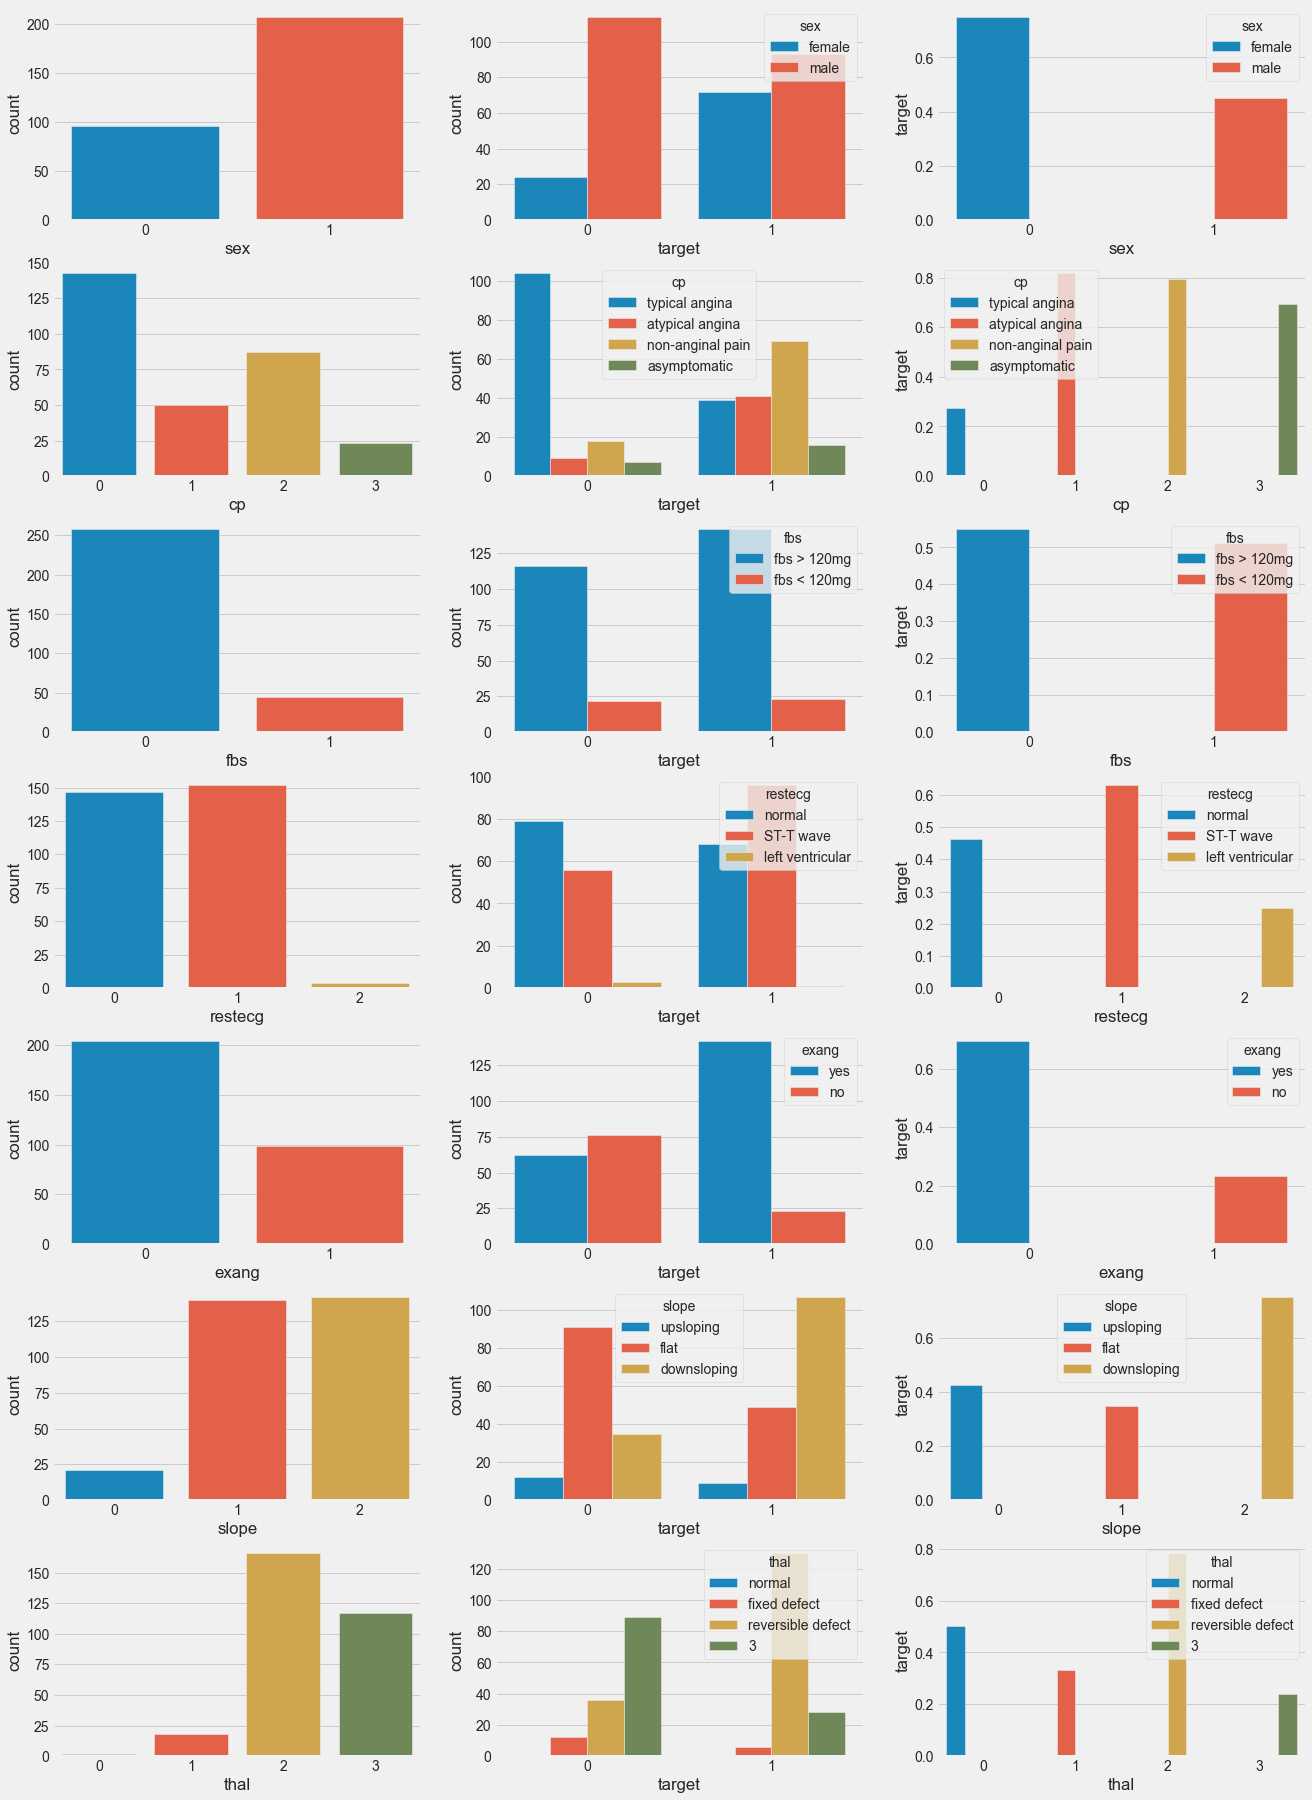

In [14]:
fig_categorial, axes = plt.subplots(nrows=len(categorial), ncols=3, figsize=(20, 30))

plotGrid(isCategorial=True)

### 📌 Notes:
We can notice that:

* cp {Chest Pain} : People with cp equal to 1, 2, 3 are more likely to have heart disease than people with cp equal to 0.
* restecg {resting electrocardiographic results} : People with value 1 (signals non-normal heart beat, can range from mild symptoms to severe problems) are more likely to have heart disease.
* exang {exercise induced angina} : People with value 0 (No ==> exercice induced angina) have heart disease more than people with value 1 (Yes ==> exercice induced angina)
* slope {the slope of the peak exercise ST segment} : People with slope value equal to 2 (Downslopins: signs of unhealthy heart) are more likely to have heart disease than people with slope value equal to 0 (Upsloping: better heart rate with excercise) or 1 (Flatsloping: minimal change (typical healthy heart)).
* ca {number of major vessels (0-3) colored by flourosopy} : the more blood movement the better so people with ca equal to 0 are more likely to have heart disease.
* thal {thalium stress result} : People with thal value equal to 2 (fixed defect: used to be defect but ok now) are more likely to have heart disease.

## Exploring more our  Continuous features:

In [15]:
continuous = [('trestbps', 'blood pressure in mm Hg'), 
              ('chol', 'serum cholestoral in mg/d'), 
              ('thalach', 'maximum heart rate achieved'), 
              ('oldpeak', 'ST depression by exercise relative to rest'), 
              ('ca', '# major vessels: (0-3) colored by flourosopy')]

In [16]:
def plotContinuous(attribute, xlabel, ax_index, axes):
    sns.histplot(heart_df, x = attribute, ax = axes[ax_index, 0])
    sns.histplot(heart_df, x = attribute, hue = 'target',kde=True, fill = True, ax = axes[ax_index, 1])
    axes[ax_index, 0].set(xlabel=xlabel, ylabel='density')
    #sns.violinplot(x='target', y=attribute, data=heart_df, ax=axes[ax_index][1])

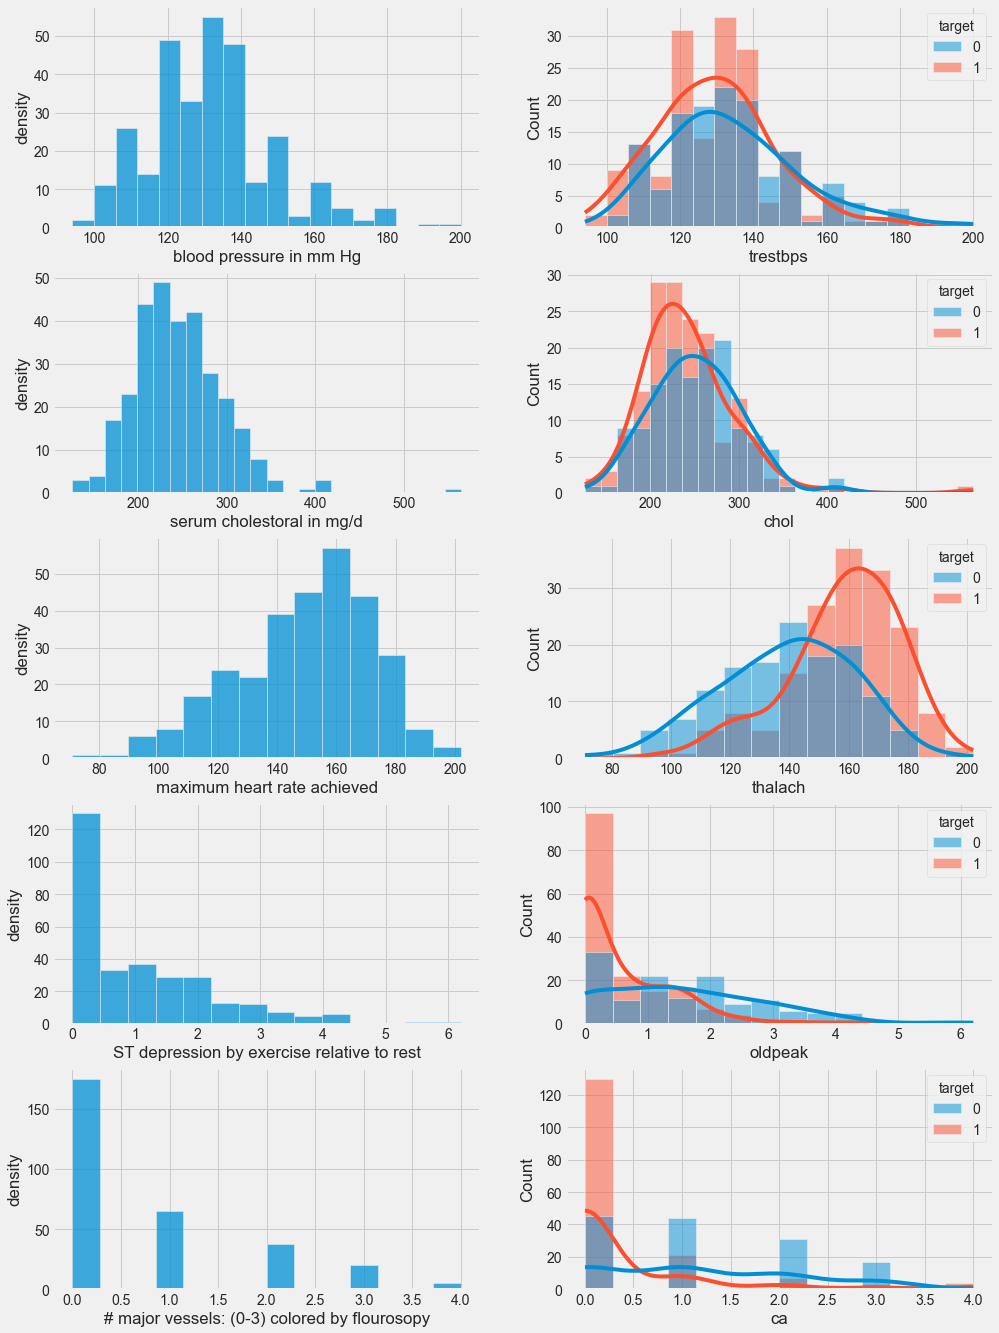

In [17]:
fig_continuous, axes = plt.subplots(nrows=len(continuous), ncols=2, figsize=(15, 22))
for row in range(len(continuous)):
    plotContinuous(continuous[row][0], continuous[row][1], row, axes)

### 📌 Notes:
from the above graphs ,we can notice that:
* trestbps : resting blood pressure (in mm Hg on admission to the hospital) anything above 130-140 is typically cause for concern
* chol {serum cholestoral in mg/dl} : above 200 is cause for concern.
* thalach {maximum heart rate achieved} : People how acheived a maximum more than 140 are more likely to have heart disease.
* oldpeak ST depression induced by exercise relative to rest looks at stress of heart during excercise unhealthy heart will stress more
    

## Let's analysing more the main features

### Heart Disease Frequency for ages

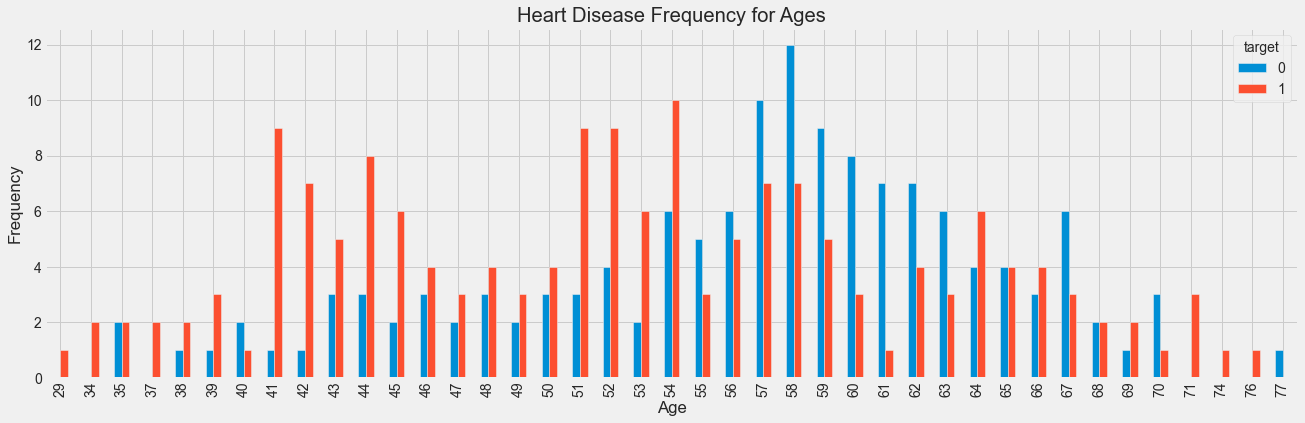

In [18]:
pd.crosstab(heart_df["age"],heart_df["target"]).plot(kind="bar",figsize=(20,6))
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.savefig('heartDiseaseAndAges.png')
plt.show()

### 📌 Note:
The sample contains more samples from age group 55 to 65 than any other age group because of the folowing reasons:
* the risk of stroke doubles every decade after age 55.
* Coronary fatty streaks is more higher for people  are 55 and older 



### Heart Disease frequency for sex 
(where 0 is female and 1 is male and "red" is have heart disease and "blue" is don't have heart disease)

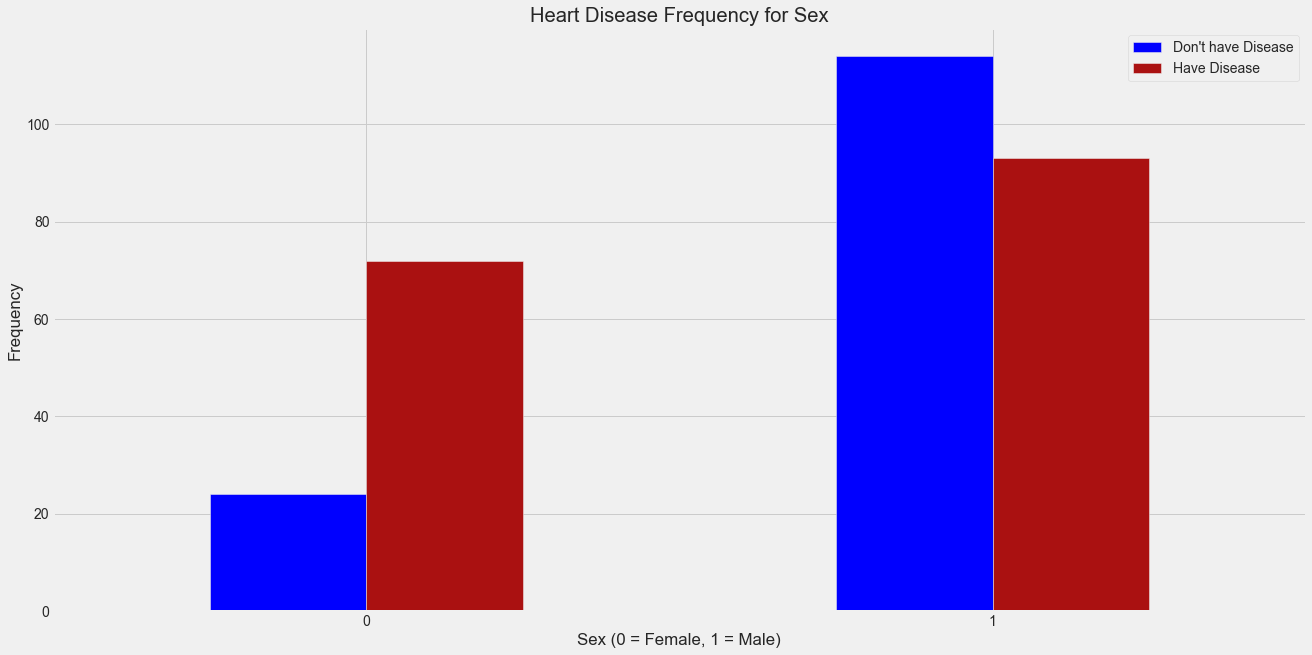

In [19]:
pd.crosstab(heart_df.sex,heart_df.target).plot(kind="bar",figsize=(20,10),color=['blue','#AA1111' ])
plt.title('Heart Disease Frequency for Sex')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.xticks(rotation=0)
plt.legend(["Don't have Disease", "Have Disease"])
plt.ylabel('Frequency')
plt.show()

### 📌 Note:
we can notice that males have more chance to have heart diseases for males than females

In [20]:
heart_df.columns = ['age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 'cholesterol', 'fasting_blood_sugar', 'rest_ecg', 'max_heart_rate_achieved',
       'exercise_induced_angina', 'st_depression', 'st_slope', 'num_major_vessels', 'thalassemia', 'target']

In [21]:
heart_df.sample(5)

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target
137,62,1,1,128,208,1,0,140,0,0.0,2,0,2,1
89,58,0,0,100,248,0,0,122,0,1.0,1,0,2,1
60,71,0,2,110,265,1,0,130,0,0.0,2,1,2,1
69,62,0,0,124,209,0,1,163,0,0.0,2,0,2,1
149,42,1,2,130,180,0,1,150,0,0.0,2,0,2,1


### Heart disease according to Fasting Blood sugar

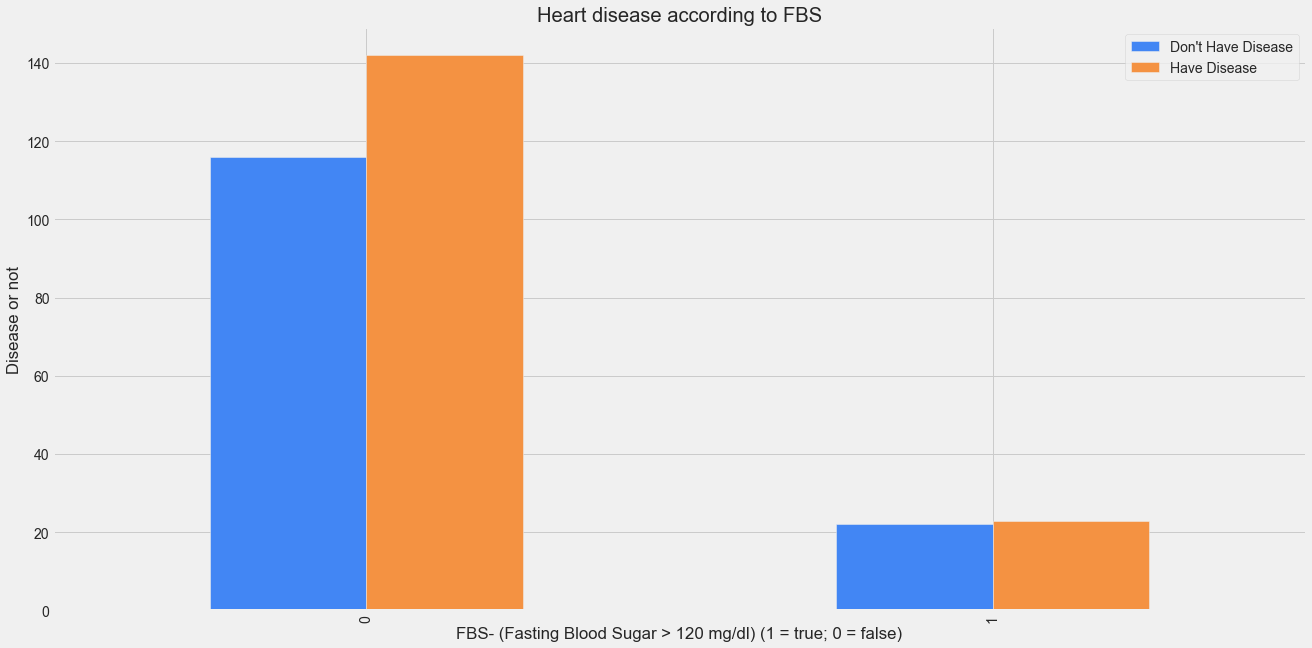

In [22]:
pd.crosstab(heart_df.fasting_blood_sugar,heart_df.target).plot(kind="bar",figsize=(20,10),color=['#4286f4','#f49242'])
plt.title("Heart disease according to FBS")
plt.xlabel('FBS- (Fasting Blood Sugar > 120 mg/dl) (1 = true; 0 = false)')
plt.xticks(rotation=90)
plt.legend(["Don't Have Disease", "Have Disease"])
plt.ylabel('Disease or not')
plt.show()

In [23]:
# this result seems to be false 

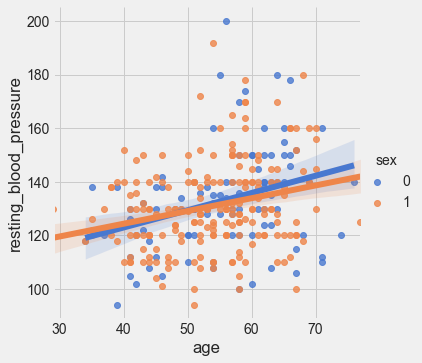

In [24]:
# Plotting the Rest Blood Pressure against age and comparison between sex
sns.lmplot(x='age', y='resting_blood_pressure', data=heart_df, hue='sex', palette='muted')
plt.show()


### 📌 Note:
* There is a positive correlation between age and rest blood pressure. The Females tend to have slightly higher chance of high blood pressure than males post the age of 50
* Clearly, blood sugar level higher than 120 mg/dl increases the risk of blood pressure as age increases.
* high blood pressure can damage arteries that feed your heart. High blood pressure that occurs with other conditions, such as obesity, high cholesterol or diabetes, increases your risk even more.

### Analysing the chest pain (4 types of chest pain)
[Value 1: typical angina, Value 2: atypical angina, Value 3: non-anginal pain, Value 4: asymptomatic]

In [25]:
heart_df["chest_pain_type"].unique()

array([3, 2, 1, 0], dtype=int64)

In [26]:
# we have 4 types of chest pain 0,1,2,3

<AxesSubplot:xlabel='chest_pain_type', ylabel='target'>

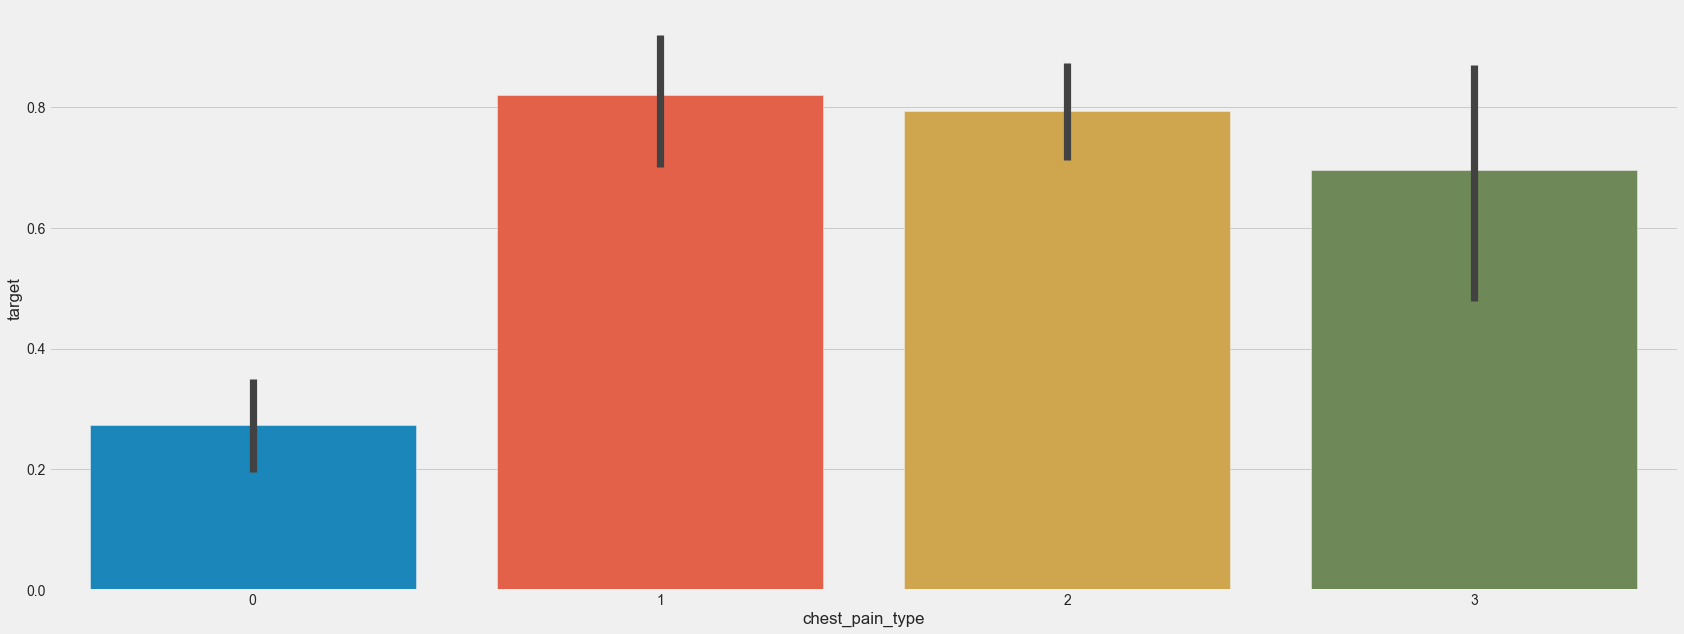

In [27]:
plt.figure(figsize=(26, 10))
sns.barplot(heart_df["chest_pain_type"],heart_df['target'])

### 📌 Note:
We can notice that:

* cp {Chest Pain} : People with cp equal to 1, 2, 3 are more likely to have heart disease than people with cp equal to 0.

### Analysing The person's resting blood pressure 
(mm Hg on admission to the hospital)

In [28]:
heart_df["resting_blood_pressure"].unique()

array([145, 130, 120, 140, 172, 150, 110, 135, 160, 105, 125, 142, 155,
       104, 138, 128, 108, 134, 122, 115, 118, 100, 124,  94, 112, 102,
       152, 101, 132, 148, 178, 129, 180, 136, 126, 106, 156, 170, 146,
       117, 200, 165, 174, 192, 144, 123, 154, 114, 164], dtype=int64)

<AxesSubplot:xlabel='resting_blood_pressure', ylabel='target'>

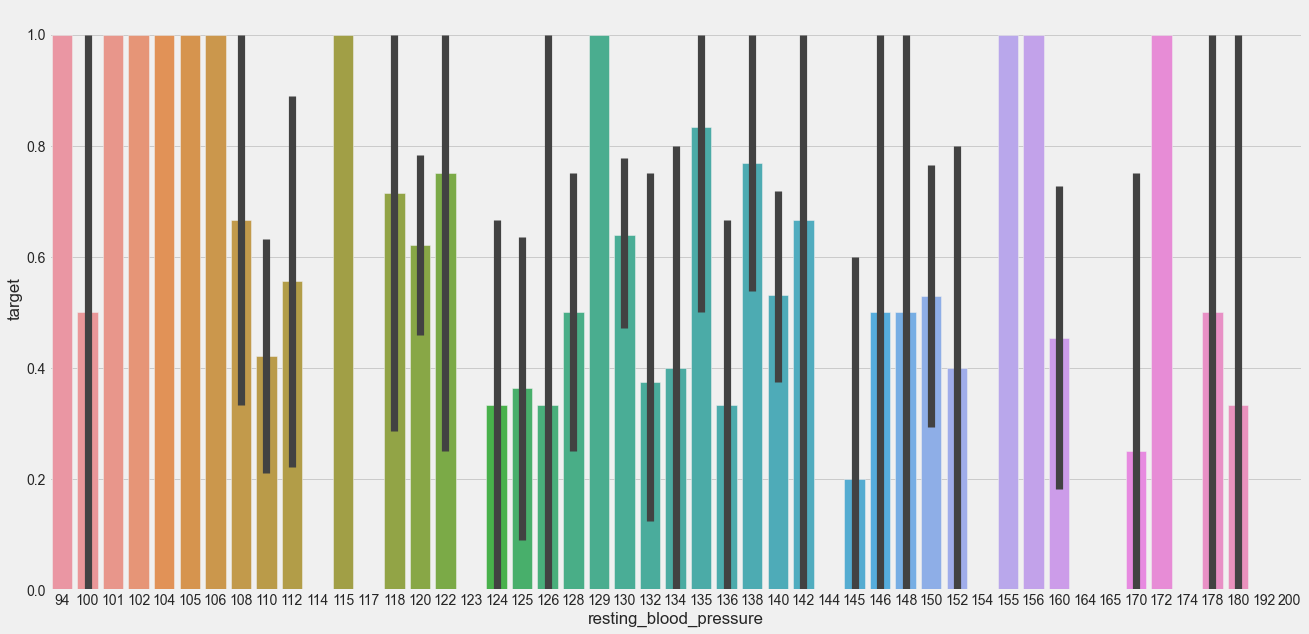

In [29]:
plt.figure(figsize=(20, 10))
sns.barplot(heart_df["resting_blood_pressure"],heart_df['target'])

### 📌 Note:
resting blood pressure (in mm Hg on admission to the hospital) anything above 130-140 is typically cause for concern

### Analysing the Resting electrocardiographic measurement 
(0 = normal, 1 = having ST-T wave abnormality, 2 = showing probable or definite left ventricular hypertrophy by Estes' criteria)

In [30]:
heart_df["rest_ecg"].unique()

array([0, 1, 2], dtype=int64)

<AxesSubplot:xlabel='rest_ecg', ylabel='target'>

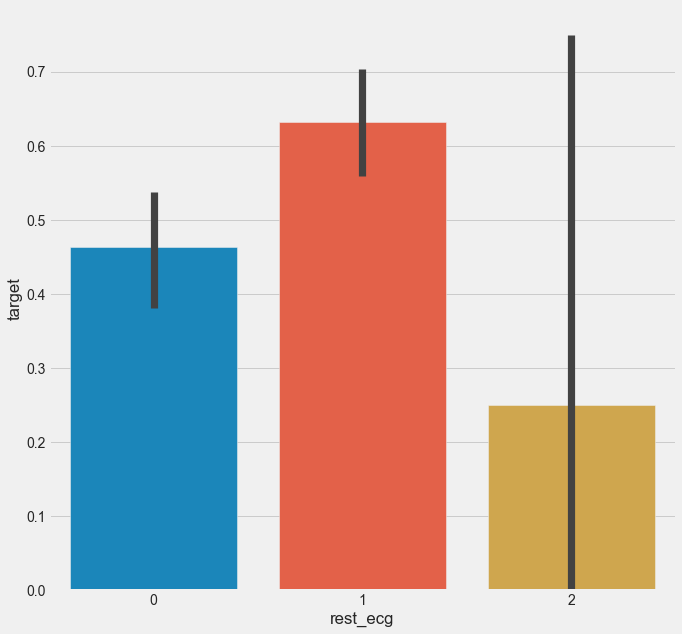

In [31]:
plt.figure(figsize=(10, 10))
sns.barplot(heart_df["rest_ecg"],heart_df['target'])

### 📌 Note:
people with restecg '1' and '0' are much more likely to have a heart disease than with restecg '2'


### Analysing Exercise induced angina 
(1 = yes; 0 = no)

In [32]:
heart_df["exercise_induced_angina"].unique()

array([0, 1], dtype=int64)

<AxesSubplot:xlabel='exercise_induced_angina', ylabel='target'>

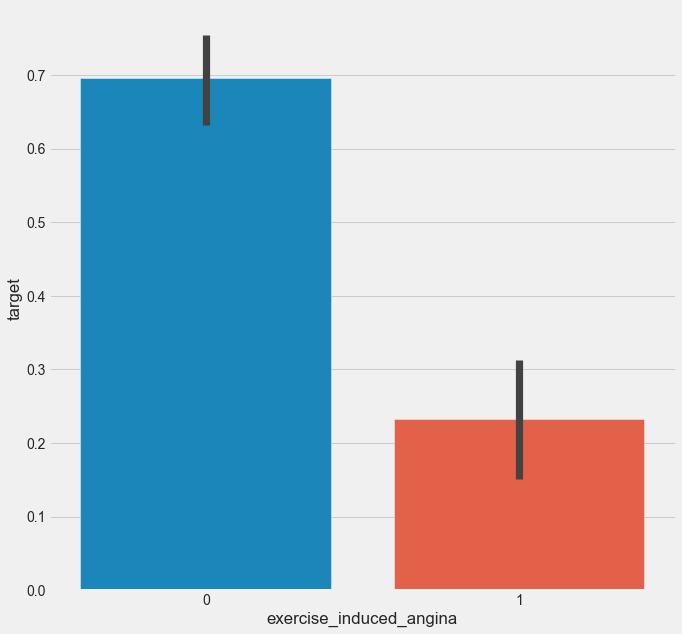

In [33]:
plt.figure(figsize=(10, 10))
sns.barplot(heart_df["exercise_induced_angina"],heart_df['target'])

### 📌 Note:
People with exercise_induced_angina=1 are much less likely to have heart problems

### Analysing the slope of the peak exercise ST segment
(Value 1: upsloping, Value 2: flat, Value 3: downsloping)

In [34]:
heart_df["st_slope"].unique()

array([0, 2, 1], dtype=int64)

<AxesSubplot:xlabel='st_slope', ylabel='target'>

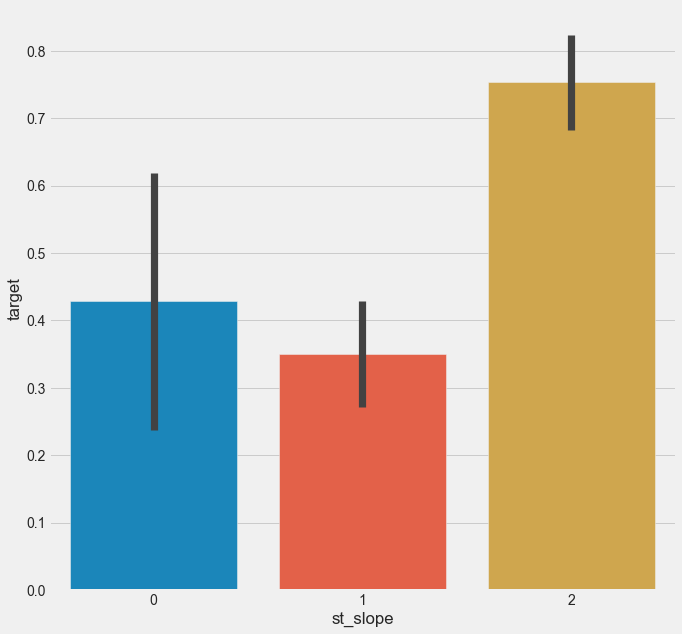

In [35]:
plt.figure(figsize=(10, 10))
sns.barplot(heart_df["st_slope"],heart_df['target'])

### 📌 Note:
Slope '2' causes heart pain much more than Slope '0' and '1'

### Analysing number of major vessels (0-3) colored by flourosopy

In [36]:
heart_df["num_major_vessels"].unique()

array([0, 2, 1, 3, 4], dtype=int64)

#### count num_major vessels

<AxesSubplot:xlabel='num_major_vessels', ylabel='count'>

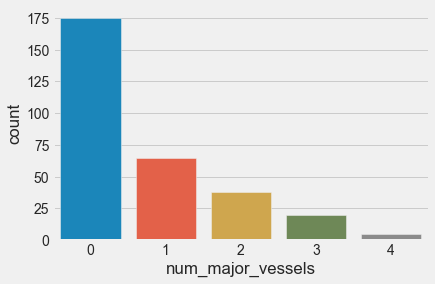

In [37]:
sns.countplot(heart_df["num_major_vessels"])

#### comparing with target

<AxesSubplot:xlabel='num_major_vessels', ylabel='target'>

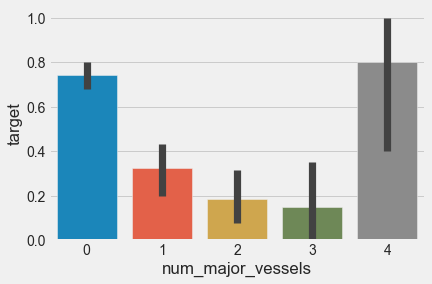

In [38]:
sns.barplot(heart_df["num_major_vessels"],heart_df['target'])

### 📌 Note:
num_major_vessels=4 has astonishingly large number of heart patients

### Analysing A blood disorder called thalassemia 
(3 = normal; 6 = fixed defect; 7 = reversable defect)

In [39]:
heart_df["thalassemia"].unique()

array([1, 2, 3, 0], dtype=int64)

#### plotting the thalassemia distribution (0,1,2,3)

<AxesSubplot:xlabel='thalassemia', ylabel='Density'>

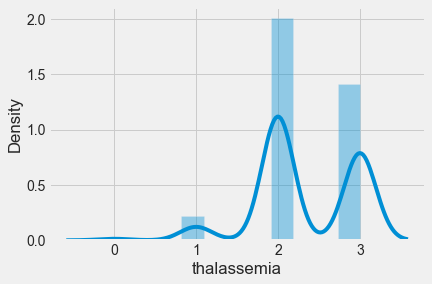

In [40]:
sns.distplot(heart_df["thalassemia"])

#### comparing with target

<AxesSubplot:xlabel='thalassemia', ylabel='target'>

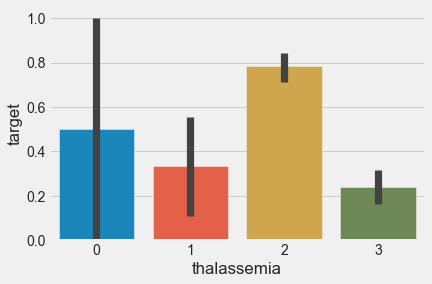

In [41]:
sns.barplot(heart_df["thalassemia"],heart_df['target'])

### Let's show more the relationships between our main feaures:

#### thalassemia and cholesterol scatterplot

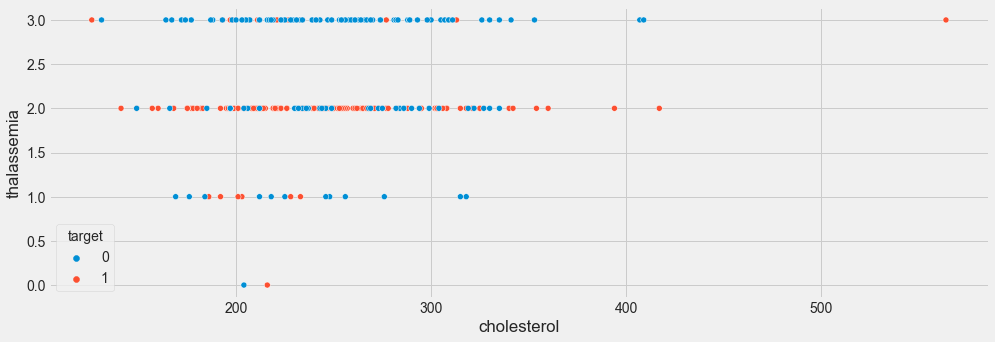

In [42]:
plt.figure(figsize=(15,5))
sns.scatterplot(x='cholesterol',y='thalassemia',data=heart_df,hue='target')
plt.show()

#### thalassemia vs resting blood pressure scatterplot

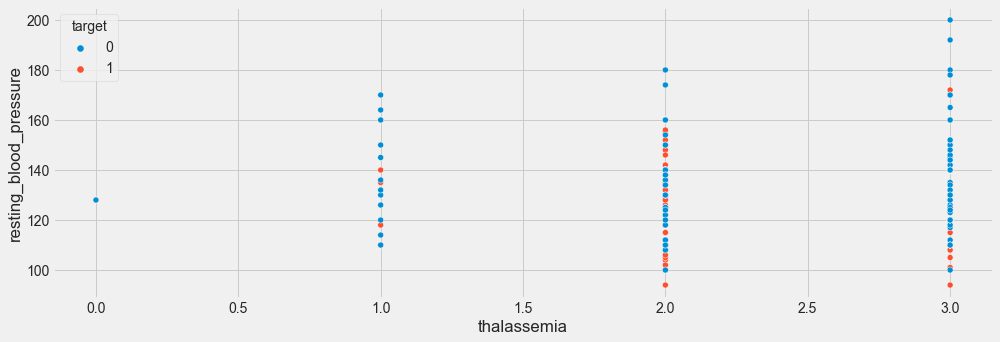

In [43]:
plt.figure(figsize=(15,5))
sns.scatterplot(x='thalassemia',y='resting_blood_pressure',data=heart_df,hue='target')
plt.show()

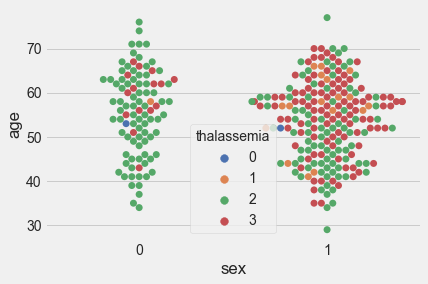

In [44]:
# Beeswarm plot for understanding the defect types for different ages in males and females
sns.swarmplot(x='sex', y='age', hue='thalassemia', data=heart_df, size=7, palette='deep')
plt.legend(title='thalassemia', loc='lower center')
plt.show()

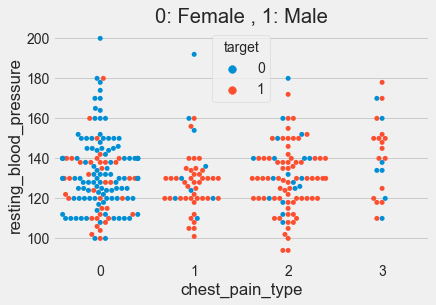

In [45]:
# Beeswarm Plot to understand the heart failures in males and females with chest pain types
sns.swarmplot(x= 'chest_pain_type', y='resting_blood_pressure', hue='target', data=heart_df)
plt.title("0: Female , 1: Male")
plt.show()

In [46]:
# Lambda Function to normalize the cholestrol a between 0 and 1
normalize = lambda col_name: heart_df[col_name] /heart_df[col_name].max()
heart_df['cholesterol_norm'] = normalize('cholesterol')

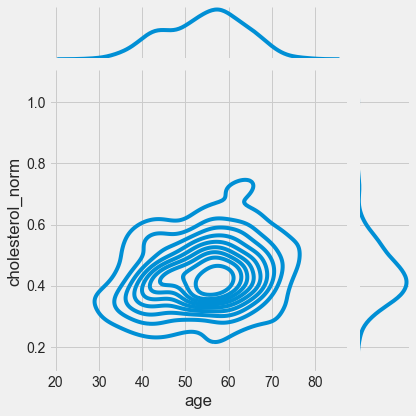

In [47]:
# Joint Plot with Contours for cholestrol levels for age groups
sns.jointplot(x='age', y='cholesterol_norm', data=heart_df, kind='kde')
plt.show()

## Correlation plot

In [48]:
# store numeric variables in cnames
cnames=['age','resting_blood_pressure','cholesterol','max_heart_rate_achieved','st_depression','num_major_vessels']

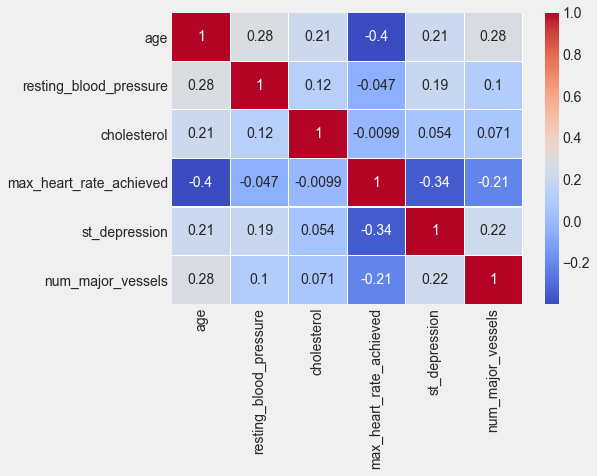

In [49]:
#Set the width and height of the plot
f, ax = plt.subplots(figsize=(7, 5))

#Correlation plot
heart_df_corr = heart_df.loc[:,cnames]
#Generate correlation matrix
heart_corr = heart_df_corr.corr()

#Plot using seaborn library
sns.heatmap(heart_corr, annot = True, cmap='coolwarm',linewidths=.1)
plt.show()

## Models Building

### Model prepration

In [50]:
y = heart_df["target"]
X = heart_df.drop('target',axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 0)

In [51]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### ML models
Here I take different machine learning algorithm and try to find algorithm which predict accurately.

1. Logistic Regression
2. Naive Bayes
3. Random Forest Classifier
4. Extreme Gradient Boost
5. K-Nearest Neighbour
6. Decision Tree
7. Support Vector Machine

#### Logistic Regression

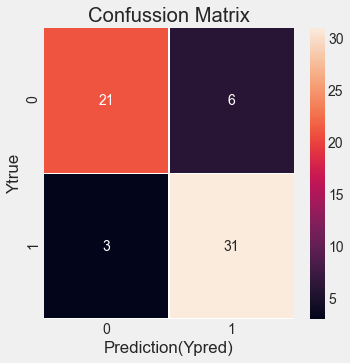



Accuracy of Logistic Regression: 85.24590163934425 

              precision    recall  f1-score   support

           0       0.88      0.78      0.82        27
           1       0.84      0.91      0.87        34

    accuracy                           0.85        61
   macro avg       0.86      0.84      0.85        61
weighted avg       0.85      0.85      0.85        61



In [52]:
m1 = 'Logistic Regression'
lr = LogisticRegression()
model = lr.fit(X_train, y_train)
lr_predict = lr.predict(X_test)
lr_conf_matrix = confusion_matrix(y_test, lr_predict)



f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(lr_conf_matrix,annot = True, linewidths=0.5,fmt=".0f",ax=ax)
plt.xlabel("Prediction(Ypred)")
plt.ylabel("Ytrue")
plt.title("Confussion Matrix")
plt.show()


lr_acc_score = accuracy_score(y_test, lr_predict)

print("\n")
print("Accuracy of Logistic Regression:",lr_acc_score*100,'\n')
print(classification_report(y_test,lr_predict))

In [53]:
test_score = accuracy_score(y_test, lr.predict(X_test)) * 100
train_score = accuracy_score(y_train, lr.predict(X_train)) * 100

results_df = pd.DataFrame(data=[["Logistic Regression", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Logistic Regression,84.297521,85.245902


### Naive Bayes

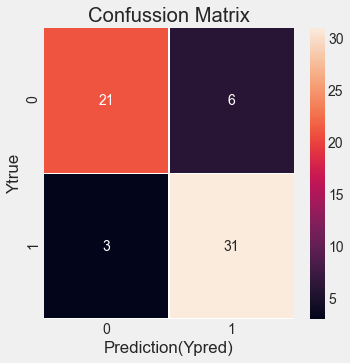



Accuracy of Naive Bayes model: 85.24590163934425 

              precision    recall  f1-score   support

           0       0.88      0.78      0.82        27
           1       0.84      0.91      0.87        34

    accuracy                           0.85        61
   macro avg       0.86      0.84      0.85        61
weighted avg       0.85      0.85      0.85        61



In [54]:
m2 = 'Naive Bayes'
nb = GaussianNB()
nb.fit(X_train,y_train)
nbpred = nb.predict(X_test)


nb_conf_matrix = confusion_matrix(y_test, nbpred)
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(nb_conf_matrix,annot = True, linewidths=0.5,fmt=".0f",ax=ax)
plt.xlabel("Prediction(Ypred)")
plt.ylabel("Ytrue")
plt.title("Confussion Matrix")
plt.show()

nb_acc_score = accuracy_score(y_test, nbpred)

print("\n")
print("Accuracy of Naive Bayes model:",nb_acc_score*100,'\n')
print(classification_report(y_test,nbpred))

In [55]:
test_score = accuracy_score(y_test, nb.predict(X_test)) * 100
train_score = accuracy_score(y_train,nb.predict(X_train)) * 100

results_df_2 = pd.DataFrame(data=[["Naive Bayes", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Logistic Regression,84.297521,85.245902
1,Naive Bayes,83.471074,85.245902


### Random Forest Classfier

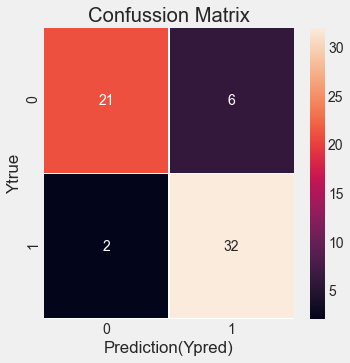



Accuracy of Random Forest: 86.88524590163934 

              precision    recall  f1-score   support

           0       0.91      0.78      0.84        27
           1       0.84      0.94      0.89        34

    accuracy                           0.87        61
   macro avg       0.88      0.86      0.86        61
weighted avg       0.87      0.87      0.87        61



In [56]:
m3 = 'Random Forest Classfier'
rf = RandomForestClassifier(n_estimators=20, random_state=12,max_depth=5)
rf.fit(X_train,y_train)
rf_predicted = rf.predict(X_test)
rf_conf_matrix = confusion_matrix(y_test, rf_predicted)


f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(rf_conf_matrix,annot = True, linewidths=0.5,fmt=".0f",ax=ax)
plt.xlabel("Prediction(Ypred)")
plt.ylabel("Ytrue")
plt.title("Confussion Matrix")
plt.show()


rf_acc_score = accuracy_score(y_test, rf_predicted)
print("\n")
print("Accuracy of Random Forest:",rf_acc_score*100,'\n')
print(classification_report(y_test,rf_predicted))

In [57]:
test_score = accuracy_score(y_test, rf.predict(X_test)) * 100
train_score = accuracy_score(y_train,rf.predict(X_train)) * 100

results_df_2 = pd.DataFrame(data=[["Random Forest", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Logistic Regression,84.297521,85.245902
1,Naive Bayes,83.471074,85.245902
2,Random Forest,92.561983,86.885246


### Extreme Gradient Boost

[22:13:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


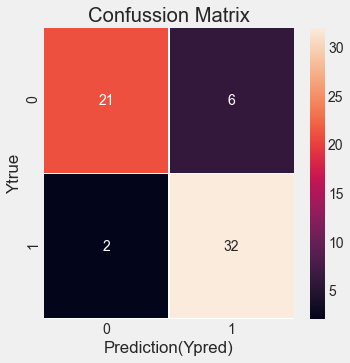



Accuracy of Extreme Gradient Boost: 83.60655737704919 

              precision    recall  f1-score   support

           0       0.90      0.70      0.79        27
           1       0.80      0.94      0.86        34

    accuracy                           0.84        61
   macro avg       0.85      0.82      0.83        61
weighted avg       0.85      0.84      0.83        61



In [58]:
m4 = 'Extreme Gradient Boost'
xgb = XGBClassifier(learning_rate=0.01, n_estimators=25, max_depth=15,gamma=0.6, subsample=0.52,colsample_bytree=0.6,seed=27, 
                    reg_lambda=2, booster='dart', colsample_bylevel=0.6, colsample_bynode=0.5)
xgb.fit(X_train, y_train)
xgb_predicted = xgb.predict(X_test)


xgb_conf_matrix = confusion_matrix(y_test, xgb_predicted)
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(rf_conf_matrix,annot = True, linewidths=0.5,fmt=".0f",ax=ax)
plt.xlabel("Prediction(Ypred)")
plt.ylabel("Ytrue")
plt.title("Confussion Matrix")
plt.show()


xgb_acc_score = accuracy_score(y_test, xgb_predicted)

print("\n")
print("Accuracy of Extreme Gradient Boost:",xgb_acc_score*100,'\n')
print(classification_report(y_test,xgb_predicted))

In [59]:
test_score = accuracy_score(y_test, xgb.predict(X_test)) * 100
train_score = accuracy_score(y_train,xgb.predict(X_train)) * 100

results_df_2 = pd.DataFrame(data=[["Gradient Boost", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Logistic Regression,84.297521,85.245902
1,Naive Bayes,83.471074,85.245902
2,Random Forest,92.561983,86.885246
3,Gradient Boost,88.016529,83.606557


### K-NeighborsClassifier

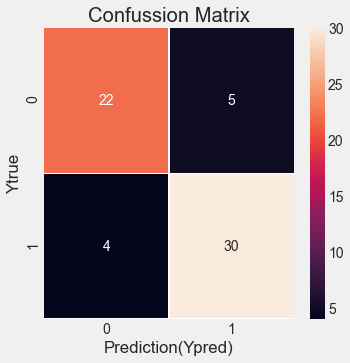



Accuracy of K-NeighborsClassifier: 85.24590163934425 

              precision    recall  f1-score   support

           0       0.85      0.81      0.83        27
           1       0.86      0.88      0.87        34

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



In [60]:
m5 = 'K-NeighborsClassifier'
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)
knn_predicted = knn.predict(X_test)
knn_conf_matrix = confusion_matrix(y_test, knn_predicted)
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(knn_conf_matrix,annot = True, linewidths=0.5,fmt=".0f",ax=ax)
plt.xlabel("Prediction(Ypred)")
plt.ylabel("Ytrue")
plt.title("Confussion Matrix")
plt.show()



knn_acc_score = accuracy_score(y_test, knn_predicted)

print("\n")
print("Accuracy of K-NeighborsClassifier:",knn_acc_score*100,'\n')
print(classification_report(y_test,knn_predicted))

In [61]:
test_score = accuracy_score(y_test, knn.predict(X_test)) * 100
train_score = accuracy_score(y_train,knn.predict(X_train)) * 100

results_df_2 = pd.DataFrame(data=[["K-NeighborsClassifier", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Logistic Regression,84.297521,85.245902
1,Naive Bayes,83.471074,85.245902
2,Random Forest,92.561983,86.885246
3,Gradient Boost,88.016529,83.606557
4,K-NeighborsClassifier,85.950413,85.245902


### DecisionTreeClassifier

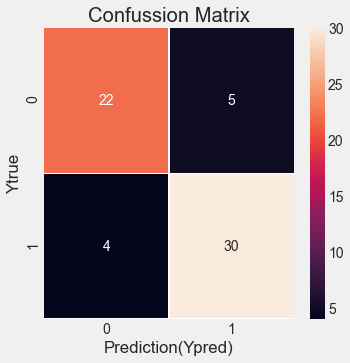



Accuracy of DecisionTreeClassifier: 81.9672131147541 

              precision    recall  f1-score   support

           0       0.77      0.85      0.81        27
           1       0.87      0.79      0.83        34

    accuracy                           0.82        61
   macro avg       0.82      0.82      0.82        61
weighted avg       0.82      0.82      0.82        61



In [62]:
m6 = 'DecisionTreeClassifier'
dt = DecisionTreeClassifier(criterion = 'entropy',random_state=0,max_depth = 6)
dt.fit(X_train, y_train)
dt_predicted = dt.predict(X_test)
dt_conf_matrix = confusion_matrix(y_test, dt_predicted)
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(knn_conf_matrix,annot = True, linewidths=0.5,fmt=".0f",ax=ax)
plt.xlabel("Prediction(Ypred)")
plt.ylabel("Ytrue")
plt.title("Confussion Matrix")
plt.show()


dt_acc_score = accuracy_score(y_test, dt_predicted)

print("\n")
print("Accuracy of DecisionTreeClassifier:",dt_acc_score*100,'\n')
print(classification_report(y_test,dt_predicted))

In [63]:
test_score = accuracy_score(y_test, dt.predict(X_test)) * 100
train_score = accuracy_score(y_train,dt.predict(X_train)) * 100

results_df_2 = pd.DataFrame(data=[["DecisionTreeClassifier", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Logistic Regression,84.297521,85.245902
1,Naive Bayes,83.471074,85.245902
2,Random Forest,92.561983,86.885246
3,Gradient Boost,88.016529,83.606557
4,K-NeighborsClassifier,85.950413,85.245902
5,DecisionTreeClassifier,95.041322,81.967213


### Support Vector Classifier

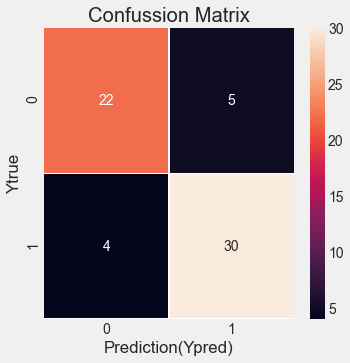



Accuracy of Support Vector Classifier: 88.52459016393442 

              precision    recall  f1-score   support

           0       0.88      0.85      0.87        27
           1       0.89      0.91      0.90        34

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.88        61



In [64]:
m7 = 'Support Vector Classifier'
svc =  SVC(kernel='rbf', C=2)
svc.fit(X_train, y_train)
svc_predicted = svc.predict(X_test)
svc_conf_matrix = confusion_matrix(y_test, svc_predicted)
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(knn_conf_matrix,annot = True, linewidths=0.5,fmt=".0f",ax=ax)
plt.xlabel("Prediction(Ypred)")
plt.ylabel("Ytrue")
plt.title("Confussion Matrix")
plt.show()


svc_acc_score = accuracy_score(y_test, svc_predicted)

print("\n")
print("Accuracy of Support Vector Classifier:",svc_acc_score*100,'\n')
print(classification_report(y_test,svc_predicted))

In [65]:
test_score = accuracy_score(y_test, svc.predict(X_test)) * 100
train_score = accuracy_score(y_train,svc.predict(X_train)) * 100

results_df_2 = pd.DataFrame(data=[["Support Vector Classifier", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Logistic Regression,84.297521,85.245902
1,Naive Bayes,83.471074,85.245902
2,Random Forest,92.561983,86.885246
3,Gradient Boost,88.016529,83.606557
4,K-NeighborsClassifier,85.950413,85.245902
5,DecisionTreeClassifier,95.041322,81.967213
6,Support Vector Classifier,94.628099,88.524590


### Model Evaluation

In [66]:
results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Logistic Regression,84.297521,85.245902
1,Naive Bayes,83.471074,85.245902
2,Random Forest,92.561983,86.885246
3,Gradient Boost,88.016529,83.606557
4,K-NeighborsClassifier,85.950413,85.245902
5,DecisionTreeClassifier,95.041322,81.967213
6,Support Vector Classifier,94.628099,88.524590


In [67]:
model_ev = pd.DataFrame({'Model': ['Logistic Regression','Naive Bayes','Random Forest','Extreme Gradient Boost',
                    'K-Nearest Neighbour','Decision Tree','Support Vector Machine'], 'Accuracy': [lr_acc_score*100,
                    nb_acc_score*100,rf_acc_score*100,xgb_acc_score*100,knn_acc_score*100,dt_acc_score*100,svc_acc_score*100]})
model_ev

,Model,Accuracy
0,Logistic Regression,85.245902
1,Naive Bayes,85.245902
2,Random Forest,86.885246
3,Extreme Gradient Boost,83.606557
4,K-Nearest Neighbour,85.245902
5,Decision Tree,81.967213
6,Support Vector Machine,88.524590


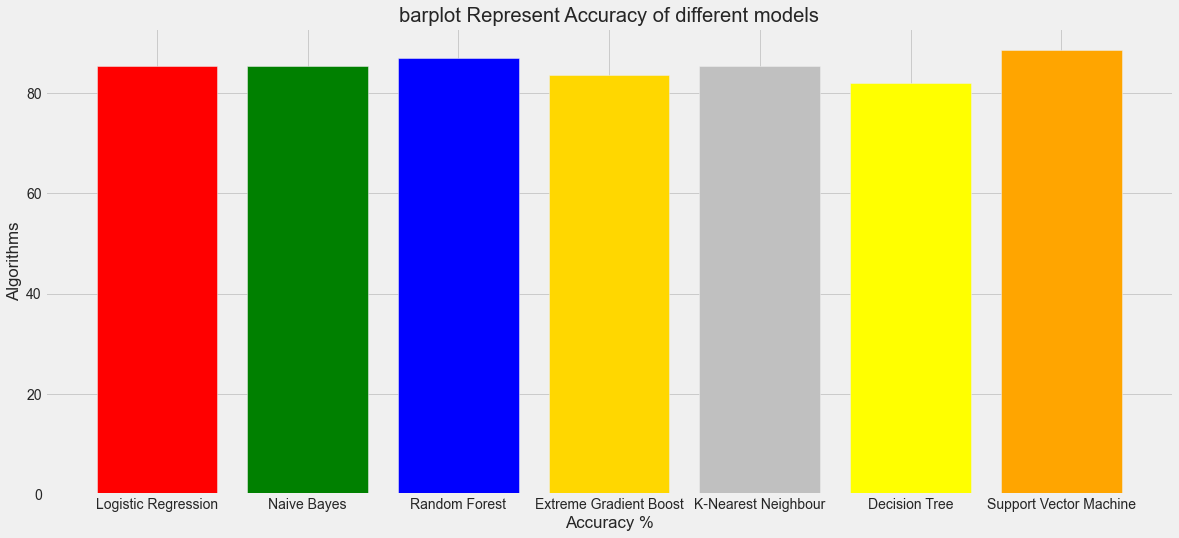

In [68]:
colors = ['red','green','blue','gold','silver','yellow','orange',]
plt.figure(figsize=(18,8))
plt.title("barplot Represent Accuracy of different models")
plt.xlabel("Accuracy %")
plt.ylabel("Algorithms")
plt.bar(model_ev['Model'],model_ev['Accuracy'],color = colors)
plt.show()

 #### Support Vector Machine gives the best Accuracy compared to other models.


### Ensembling
###### In order to increase the accuracy of the model we use ensembling. Here we use stacking technique.

In [69]:
scv=StackingCVClassifier(classifiers=[xgb,rf,svc],meta_classifier= svc,random_state=42)
scv.fit(X_train,y_train)
scv_predicted = scv.predict(X_test)
scv_conf_matrix = confusion_matrix(y_test, scv_predicted)
scv_acc_score = accuracy_score(y_test, scv_predicted)
print("confussion matrix")
print(scv_conf_matrix)
print("\n")
print("Accuracy of StackingCVClassifier:",scv_acc_score*100,'\n')
print(classification_report(y_test,scv_predicted))

[22:13:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:13:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:13:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
confussion matrix
[[21  6]
 [ 2 32]]


Accuracy of StackingCVClassifie